In [85]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [86]:
df = pd.read_csv("C:/Users/Hing/Desktop/Data Science/Machine Learning/Titanic/Train, test, prediction/train.csv")

In [87]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

In [90]:
# look at the # of missing points in the first ten columns
missing_values_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
import seaborn as sns

C:\Users\Hing\anaconda3\envs\tf-keras-gpu-test2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Age'>

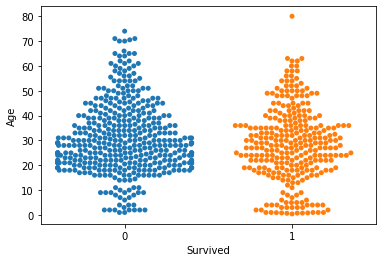

In [92]:
sns.swarmplot(x=df['Survived'],
              y=df['Age'])

There may be outliner, age over 80, in survived = 1. 

<AxesSubplot:xlabel='Age', ylabel='Density'>

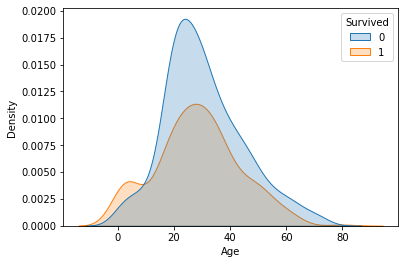

In [93]:
sns.kdeplot(data=df, x='Age', hue='Survived', shade=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

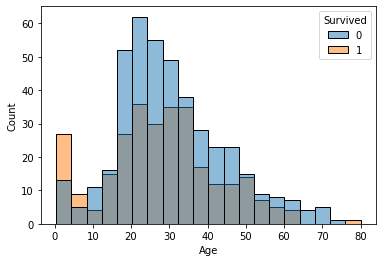

In [94]:
sns.histplot(data=df, x='Age', hue='Survived')

Age less than 5 had better chance of survival.

<AxesSubplot:xlabel='Sex', ylabel='Count'>

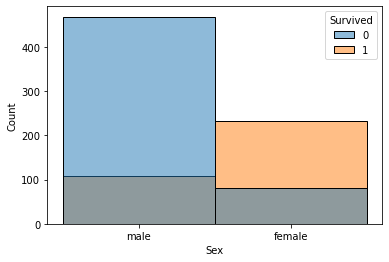

In [95]:
sns.histplot(data=df, x="Sex", hue = 'Survived')

In [96]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Female had better chance of survival.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

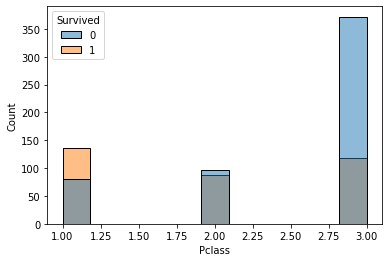

In [97]:
sns.histplot(data=df, x="Pclass", hue = 'Survived')

In [98]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass (Ticket class) 1 had better chance of survival.

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

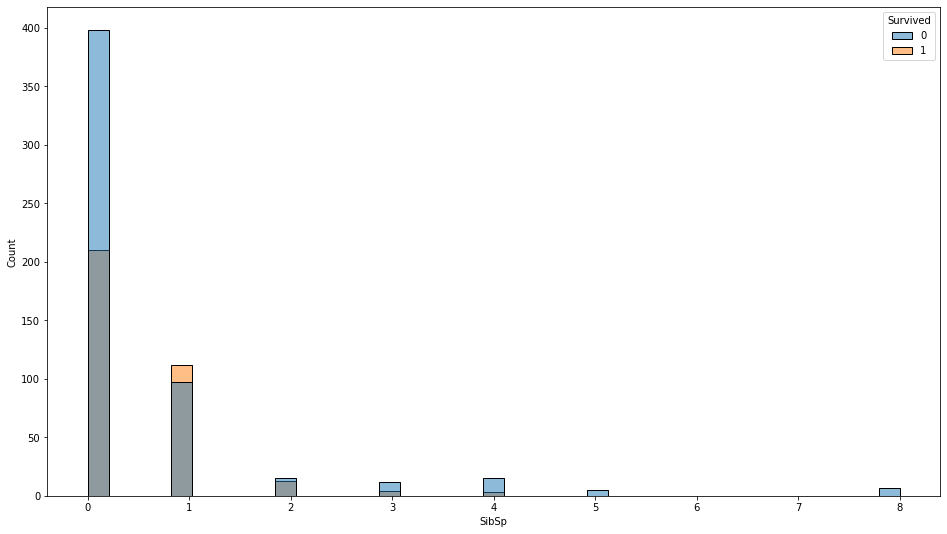

In [99]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x="SibSp", hue = 'Survived')

In [100]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


sibsp (# of siblings / spouses aboard the Titanic) = 1 had better chance of survival.

<AxesSubplot:xlabel='Parch', ylabel='Count'>

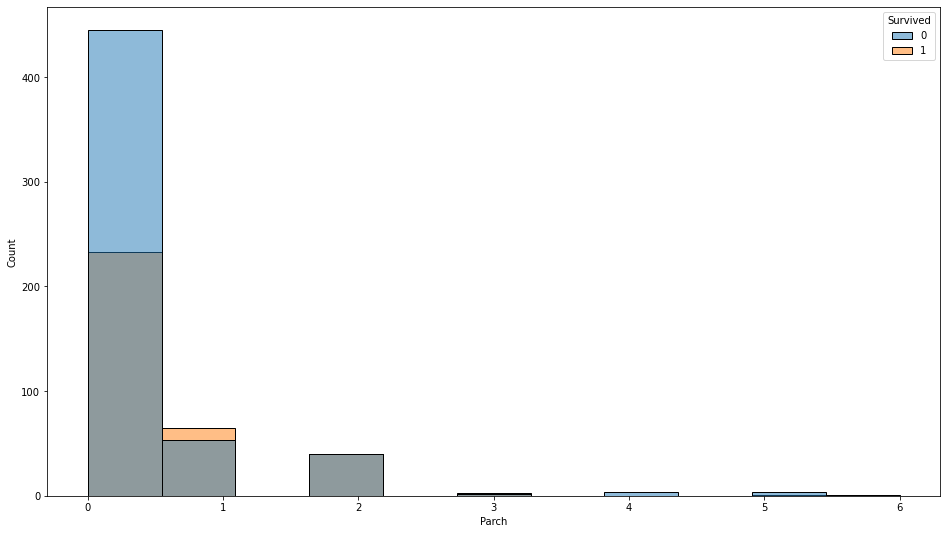

In [101]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x="Parch", hue = 'Survived')

In [102]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


parch (# of parents / children aboard the Titanic) = 1 (and 3)  had better chance of survival.

C:\Users\Hing\anaconda3\envs\tf-keras-gpu-test2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hing\anaconda3\envs\tf-keras-gpu-test2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

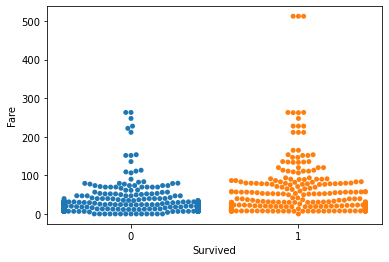

In [103]:
sns.swarmplot(x=df['Survived'],
              y=df['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

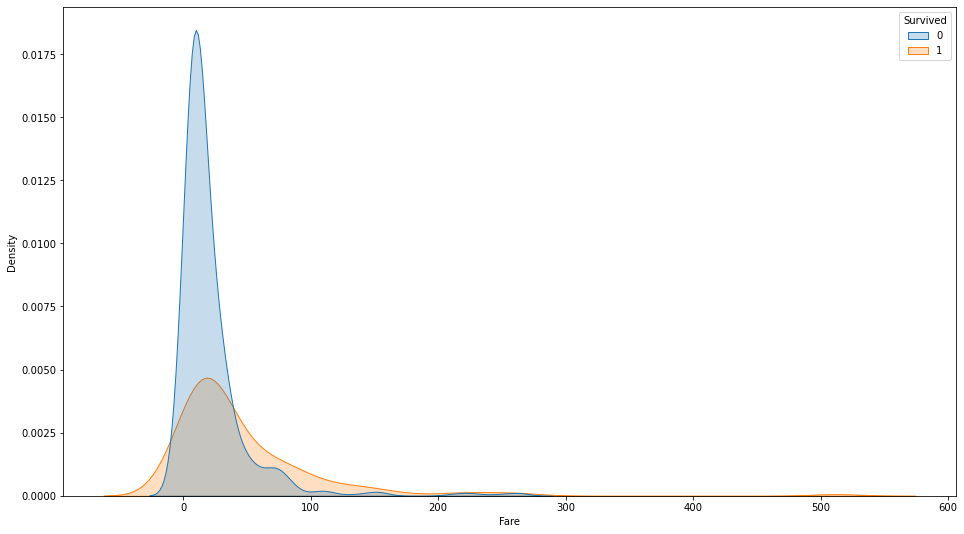

In [104]:
plt.figure(figsize=(16,9))
sns.kdeplot(data=df, x='Fare', hue='Survived', shade=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

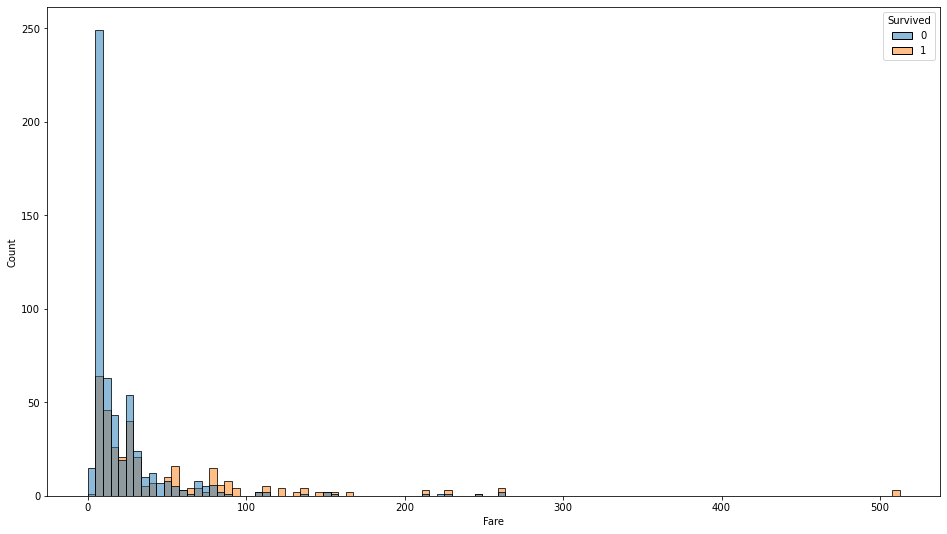

In [105]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='Fare', hue='Survived')

Fare over 50 had better chance of survival.

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

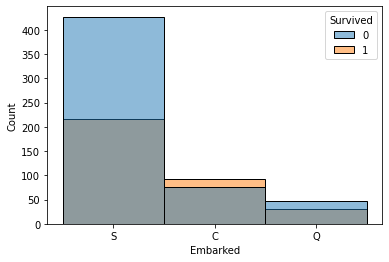

In [106]:
sns.histplot(data=df, x='Embarked', hue='Survived')

In [107]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Embarked in C (Cherbourg) had better chance of survival.

In [108]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

<AxesSubplot:xlabel='FamilySize', ylabel='Count'>

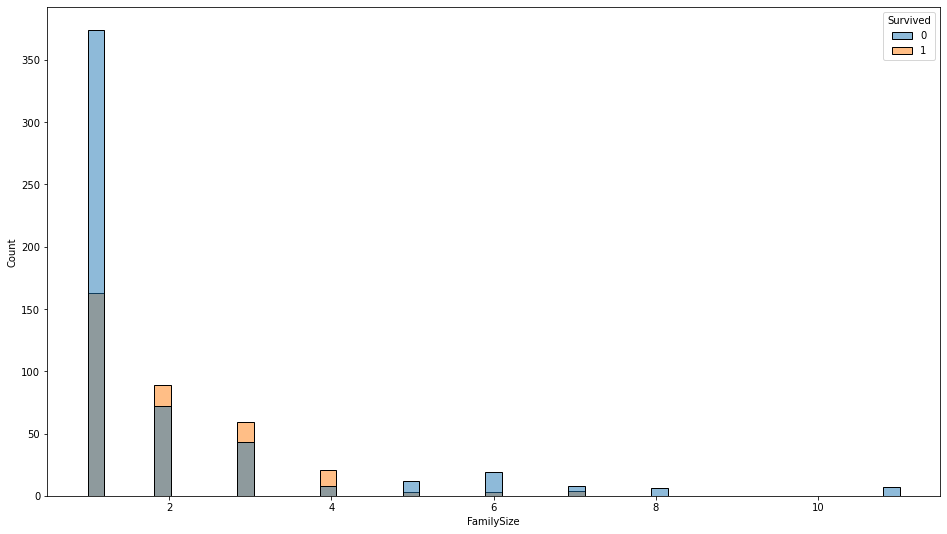

In [109]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x="FamilySize", hue = 'Survived')

In [110]:
df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Family with size 2, 3, 4 had better chance of survival.

In [111]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

T may be outliner

In [112]:
df['Cabin_Letter'] = df['Cabin'].apply(lambda x: str(x)[0])

In [113]:
df.Cabin_Letter.unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<AxesSubplot:xlabel='Cabin_Letter', ylabel='Count'>

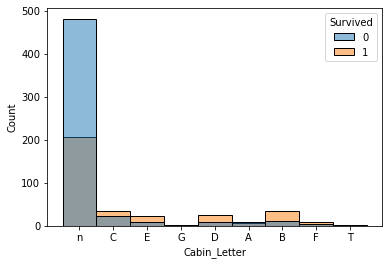

In [114]:
sns.histplot(data=df, x="Cabin_Letter", hue = 'Survived')

In [115]:
df[['Cabin_Letter', 'Survived']].groupby(['Cabin_Letter'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin_Letter,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
8,n,0.299854
7,T,0.000000


Passenger in Cabin D, E, B, C and F had better chance of survival.

In [116]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
FamilySize        0
Cabin_Letter      0
dtype: int64

In [117]:
df["Age"].fillna(-1, inplace = True)

In [118]:
df["Embarked"].fillna(-1, inplace = True)

In [119]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
FamilySize        0
Cabin_Letter      0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      891 non-null    object 
 12  FamilySize    891 non-null    int64  
 13  Cabin_Letter  891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [121]:
d = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(d)

In [122]:
d = {'C': 0, 'Q': 1, 'S':2}
df['Embarked'] = df['Embarked'].map(d)

In [123]:
d = {'A': 0, 'B': 1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, 'n':-1}
df['Cabin_Letter'] = df['Cabin_Letter'].map(d)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    float64
 12  FamilySize    891 non-null    int64  
 13  Cabin_Letter  891 non-null    int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 97.6+ KB


In [125]:
df["Embarked"].fillna(-1, inplace = True)

In [126]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Cabin_Letter']

X = df[features]
y = df['Survived']

In [127]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05) # 95% training and 5% test

In [128]:
# get the number of missing data points per column
missing_values_count = X.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
FamilySize      0
Cabin_Letter    0
dtype: int64

In [129]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=400)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [130]:
y_pred=clf.predict(X_test)

In [131]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


In [132]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Sex             0.264076
Fare            0.234275
Age             0.224438
Pclass          0.069893
Cabin_Letter    0.067329
FamilySize      0.051114
Embarked        0.032633
SibSp           0.028577
Parch           0.027665
dtype: float64

<AxesSubplot:>

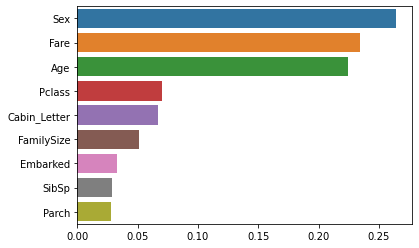

In [133]:
sns.barplot(x=feature_imp, y=feature_imp.index)

In [134]:
df1 = pd.read_csv("C:/Users/Hing/Desktop/Data Science/Machine Learning/Titanic/Train, test, prediction/test.csv")
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [135]:
# get the number of missing data points per column
missing_values_count = df1.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

C:\Users\Hing\anaconda3\envs\tf-keras-gpu-test2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hing\anaconda3\envs\tf-keras-gpu-test2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hing\anaconda3\envs\tf-keras-gpu-test2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

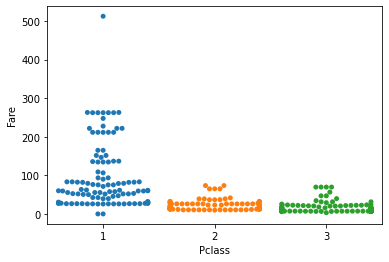

In [136]:
sns.swarmplot(x=df1['Pclass'],
              y=df1['Fare'])

In [137]:
df[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).median().sort_values(by='Fare', ascending=False)

,Pclass,Fare
0,1,60.2875
1,2,14.2500
2,3,8.0500


In [138]:
df1[df1['Fare'].isnull()].index.tolist()

[152]

In [139]:
df1.loc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [140]:
df1["Fare"].fillna(8.05, inplace = True)

In [141]:
df1["Age"].fillna(-1, inplace = True)

In [142]:
d = {'male': 0, 'female': 1}
df1['Sex'] = df1['Sex'].map(d)

In [143]:
d = {'C': 0, 'Q': 1, 'S':2}
df1['Embarked'] = df1['Embarked'].map(d)

In [144]:
df1['Cabin_Letter'] = df1['Cabin'].apply(lambda x: str(x)[0])

In [145]:
d = {'A': 0, 'B': 1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, 'n':-1}
df1['Cabin_Letter'] = df1['Cabin_Letter'].map(d)

In [146]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1

In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Sex           418 non-null    int64  
 4   Age           418 non-null    float64
 5   SibSp         418 non-null    int64  
 6   Parch         418 non-null    int64  
 7   Ticket        418 non-null    object 
 8   Fare          418 non-null    float64
 9   Cabin         91 non-null     object 
 10  Embarked      418 non-null    int64  
 11  Cabin_Letter  418 non-null    int64  
 12  FamilySize    418 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 42.6+ KB


In [148]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Cabin_Letter']
X1 = df1[features]

In [149]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Sex           418 non-null    int64  
 2   Age           418 non-null    float64
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   Fare          418 non-null    float64
 6   Embarked      418 non-null    int64  
 7   FamilySize    418 non-null    int64  
 8   Cabin_Letter  418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [150]:
df1['Survived'] = clf.predict(X1)

In [151]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,FamilySize,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1,-1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2,-1,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1,-1,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2,-1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2,-1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,-1.0,0,0,A.5. 3236,8.0500,NaN,2,-1,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0,2,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,-1,1,0
416,1308,3,"Ware, Mr. Frederick",0,-1.0,0,0,359309,8.0500,NaN,2,-1,1,0


In [152]:
output = pd.DataFrame({'PassengerId': df1.PassengerId,
                       'Survived': df1.Survived})
output.to_csv('submission2.csv', index=False)